In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
from scipy import __version__ as scipy_version
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._decorators")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster._kmeans")
warnings.filterwarnings("ignore", category=UserWarning, module="scipy")

In [2]:
# Importing Data

In [3]:
df = pd.read_csv(r"C:\Users\jaanv\Desktop\OnlineRetail (3).csv", encoding = 'latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [7]:
# Data Cleaning

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
null_values = round(100*(df.isnull().sum())/len(df), 2)
null_values

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [10]:
df = df.dropna()
df.shape

(406829, 8)

In [11]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
# Converting invoice date from object datatype to numeric (Datetime) datatype

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [14]:
# RFM 
# Extracting R(recency), F(Frequency) and M(Monetary) Columns from the dataset

In [15]:
# We form another column as "Total Amount" from the data by multiplying quantity and unit price 
df["TotalAmount"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [16]:
# extracting Monetary value - amount spent by each customer
monetary = df.groupby("CustomerID")["TotalAmount"].sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,TotalAmount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [17]:
# Frequency value
frequency = df.groupby("CustomerID")["InvoiceNo"].count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [18]:
# Merging Monetary and Frequency columns
df_merged = monetary.merge(frequency, on = "CustomerID", how = "inner")
df_merged.head()

,CustomerID,TotalAmount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [19]:
# To find the recency value, we need to first find the last date in the Invoice column to check when the last transaction occured
last_day= max(df['InvoiceDate'])
last_day

Timestamp('2011-12-09 12:50:00')

In [20]:
df['difference'] = last_day - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [21]:
def get_days(x):
    y = str(x).split()[0]
    return int(y)
df['difference'] = df['difference'].apply(get_days)

In [22]:
# Extracting Recency from the datset
recency = df.groupby('CustomerID')['difference'].min()
recency = recency.reset_index()
recency.head()

,CustomerID,difference
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [23]:
# Merging the recency column with df_merged dataframe
# RFM Combined dataframe
RFM = df_merged.merge(recency, on = "CustomerID")
RFM.columns = ['CustomerID', 'TotalAmount', 'Frequency', 'Recency']
RFM.head()

,CustomerID,TotalAmount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [24]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   4372 non-null   float64
 1   TotalAmount  4372 non-null   float64
 2   Frequency    4372 non-null   int64  
 3   Recency      4372 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 170.8 KB


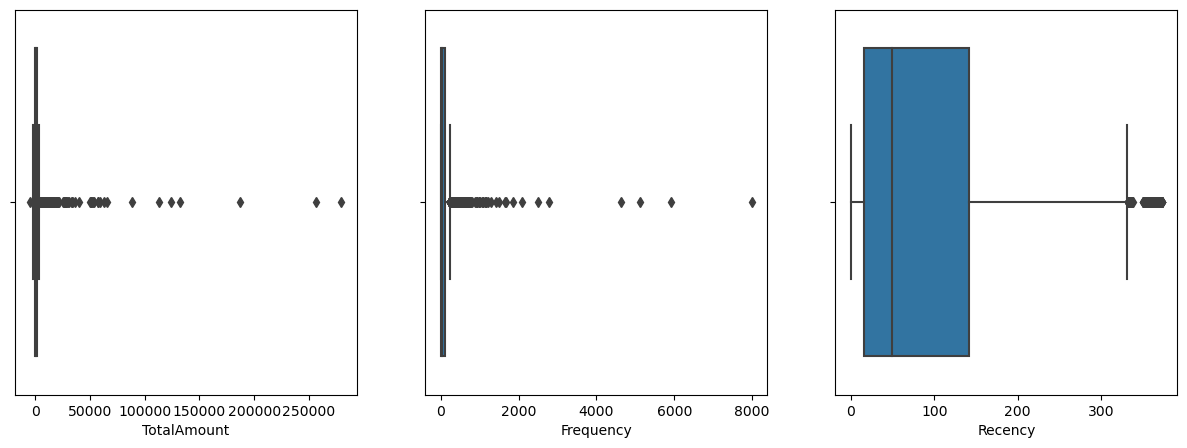

In [25]:
# Checking for outliers in the data
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(RFM['TotalAmount'], ax = axs[0])
sns.boxplot(RFM['Frequency'], ax = axs[1])
sns.boxplot(RFM['Recency'], ax = axs[2])

plt.tight_layout
plt.show()

In [26]:
# Outlier treatment for TotalAmount
Q1 = RFM['TotalAmount'].quantile(0.25)
Q3 = RFM['TotalAmount'].quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM['TotalAmount'] >= Q1 - 1.5*IQR) & (RFM['TotalAmount'] <= Q3 + 1.5*IQR)]

In [27]:
# Outlier treatment for Frequency
Q1 = RFM['Frequency'].quantile(0.25)
Q3 = RFM['Frequency'].quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM['Frequency'] >= Q1 - 1.5*IQR) & (RFM['Frequency'] <= Q3 + 1.5*IQR)]

In [28]:
# Outlier treatment for Recency
Q1 = RFM['Recency'].quantile(0.25)
Q3 = RFM['Recency'].quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM['Recency'] >= Q1 - 1.5*IQR) & (RFM['Recency'] <= Q3 + 1.5*IQR)]

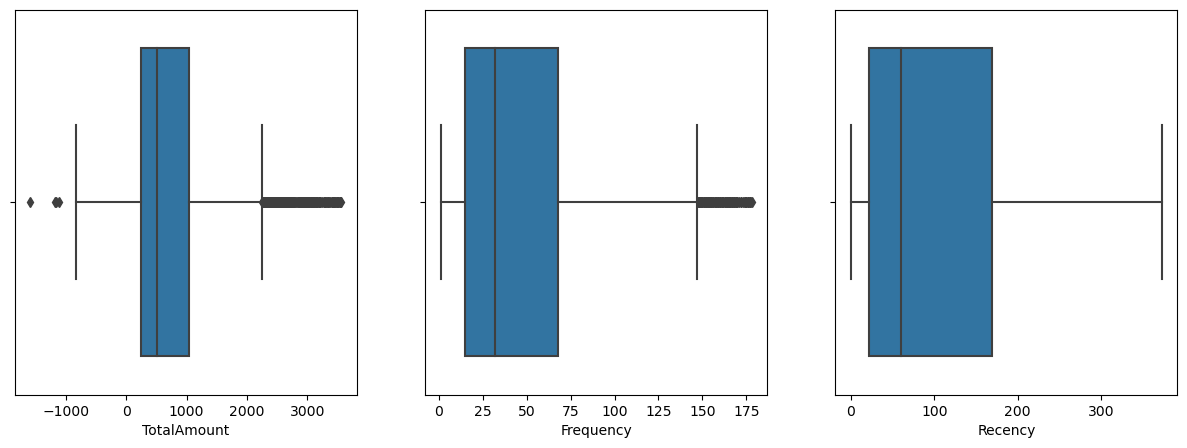

In [29]:
# Checking for the outliers once again with the help of boxplpots
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(RFM['TotalAmount'], ax = axs[0])
sns.boxplot(RFM['Frequency'], ax = axs[1])
sns.boxplot(RFM['Recency'], ax = axs[2])

plt.tight_layout
plt.show()

In [30]:
RFM.head()

,CustomerID,TotalAmount,Frequency,Recency
0,12346.0,0.00,2,325
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,1545.41,95,35


In [31]:
# Scaling the RFM data
from sklearn.preprocessing import StandardScaler

In [32]:
scaled_df = RFM[['TotalAmount', 'Frequency', 'Recency']]

In [33]:
scale_standardisation = StandardScaler()

In [34]:
rfm_df_scaled= scale_standardisation.fit_transform(scaled_df)

In [35]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['monetary','frequency','recency']

In [36]:
rfm_df_scaled.head()

,monetary,frequency,recency
0,-1.041614,-1.070949,2.136422
1,1.385298,-0.375498,-0.282050
2,1.331702,0.631707,-0.821629
3,-0.590055,-0.711233,1.982257
4,1.045238,1.159290,-0.657828


In [37]:
# K - Means 
# We will use elbow method to find the number of optimal clusters
from sklearn.cluster import KMeans

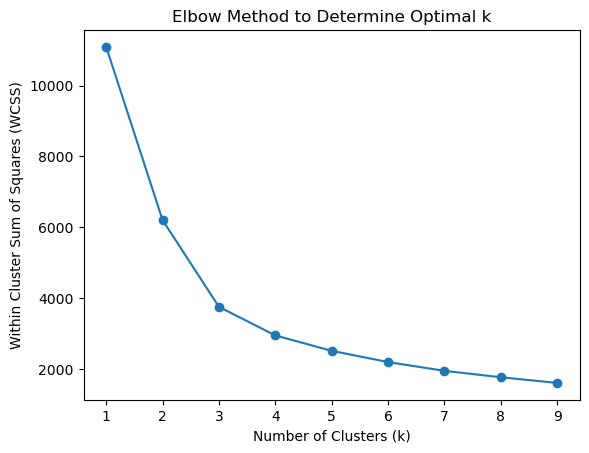

In [38]:
k_values = list(range(1,10))
wcss_list = []
for k in k_values:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit_transform(rfm_df_scaled)
    wcss_list.append(kmeans.inertia_)
    
plt.plot(k_values,wcss_list, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method to Determine Optimal k")
plt.show()

In [39]:
# The above graph shows that at 3, the elbow starts, so we will take our clusters as 3
kmeans = KMeans(n_clusters = 3)
kmeans.fit(rfm_df_scaled)
clusters = kmeans.labels_

In [42]:
RFM['Clusters'] = clusters

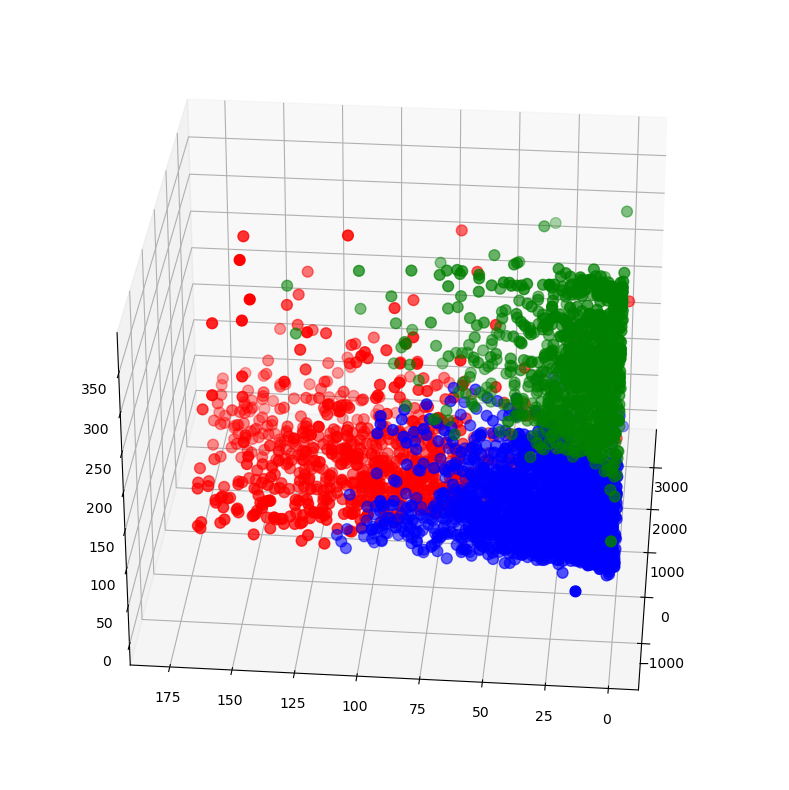

In [44]:
fig = plt.figure(figsize=(21, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(RFM["TotalAmount"][RFM['Clusters'] == 0], RFM["Frequency"][RFM['Clusters'] == 0], RFM["Recency"][RFM['Clusters'] == 0], c='green', s=60)
ax.scatter(RFM["TotalAmount"][RFM['Clusters'] == 1], RFM["Frequency"][RFM['Clusters'] == 1], RFM["Recency"][RFM['Clusters'] == 1], c='red', s=60)
ax.scatter(RFM["TotalAmount"][RFM['Clusters'] == 2], RFM["Frequency"][RFM['Clusters'] == 2], RFM["Recency"][RFM['Clusters'] == 2], c='blue', s=60)
ax.view_init(30, 185)
plt.show()

In [47]:
analysis = RFM.groupby('Clusters').agg({
    'Recency':['mean','max','min'],
    'Frequency':['mean','max','min'],
    'TotalAmount':['mean','max','min','count']})

In [48]:
analysis_table = pd.DataFrame(analysis)
analysis_table

Recency             Frequency           TotalAmount           \
                mean  max  min        mean  max min         mean      max   
Clusters                                                                    
0         254.745380  373  133   20.686858  137   1   327.313029  2661.24   
1          43.600254  337    0  109.586294  178   1  1844.383415  3563.85   
2          51.327649  178    0   34.104393  116   1   557.908193  2207.40   

                         
              min count  
Clusters                 
0        -1592.49   974  
1          303.09   788  
2        -1165.30  1935

In [ ]:
# The above table shows Cluster 1 represents loyal customers who have made recent and frequent purchases, contributing significantly to the total revenue.
# Cluster 2 are the new customers  who have made recent purchases but are not as frequent or high-spending as Cluster 1.
# Cluster 0 represents customers at risk of leaving or who are less engaged, given the longer time since their last purchase and lower transaction frequency.